# 机器学习调参

### 调参准则：增加泛化能力  （Genelization error）
　　那模型的复杂度与我们的参数有什么关系呢？对树模型来说，树越茂盛，深度越深，枝叶越多，模型就越复杂。所
以树模型是天生位于图的右上角的模型，随机森林是以树模型为基础，所以随机森林也是天生复杂度高的模型。随
机森林的参数，都是向着一个目标去：减少模型的复杂度，把模型往图像的左边移动，防止过拟合。当然了，调参
没有绝对，也有天生处于图像左边的随机森林，<font color = red>所以调参之前，我们要先判断，模型现在究竟处于图像的哪一边。</font>

![](./imgs/gen.png)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
rfc = RandomForestClassifier()

In [13]:
cancer = load_breast_cancer()

In [14]:
cancer.data.shape

(569, 30)

In [15]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [17]:
rfc = RandomForestClassifier(n_estimators=100, random_state=10)
score_pre = cross_val_score(rfc, cancer.data, cancer.target, cv = 10).mean()
score_pre

0.9650289516895688

#### 粗调分类器个数（观察整体的趋势）

In [21]:
score = []

for i in range(0, 200, 10):
    """每10的estimators作为分类器"""
    rfc = RandomForestClassifier(random_state=10
                                 ,n_estimators=i+1
                                 ,n_jobs = -1
                                )
    score.append(cross_val_score(rfc
                                 , cancer.data
                                 , cancer.target
                                 , cv=10
                                 , scoring = "accuracy"
                                ).mean())

Max accuracy:0.9667854982283295
The best estimators:21


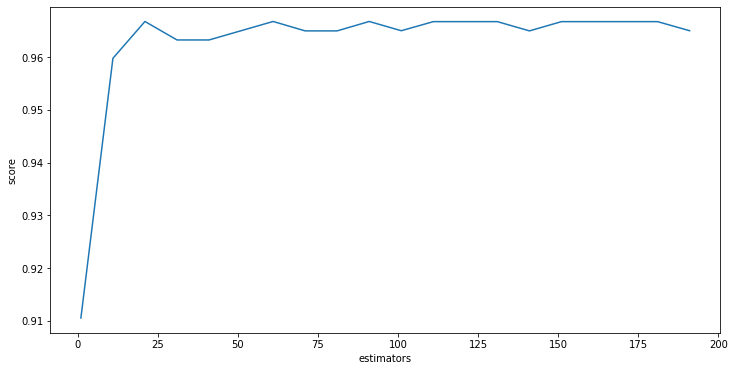

In [22]:
print("Max accuracy:{}\nThe best estimators:{}".format(max(score)
      ,score.index(max(score))*10 +1))
plt.figure(figsize = (12, 6))
plt.plot(range(1, 201, 10), score)
plt.xlabel("estimators")
plt.ylabel("score")
plt.show()

#### 精调分类器个数｀

In [26]:
score = []

for i in range(15, 25):
    """每10的estimators作为分类器"""
    rfc = RandomForestClassifier(random_state=10
                                 ,n_estimators=i
                                 ,n_jobs = -1
                                )
    score.append(cross_val_score(rfc
                                 , cancer.data
                                 , cancer.target
                                 , cv=10
                                 , scoring = "accuracy"
                                
                                ).mean())

Max accuracy:0.9667854982283295
The best estimators:21


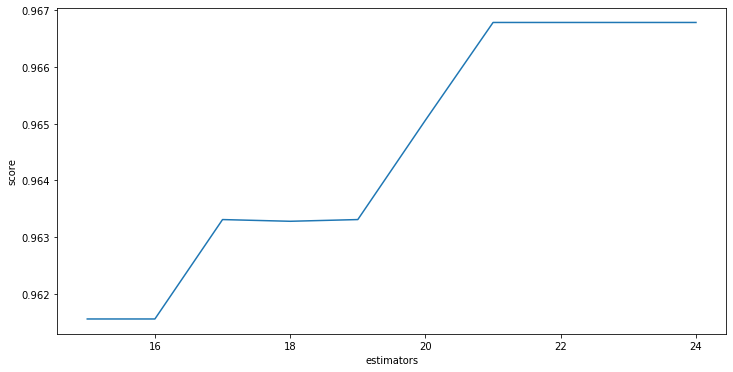

In [27]:
print("Max accuracy:{}\nThe best estimators:{}".format(max(score)
      ,score.index(max(score))+15))
plt.figure(figsize = (12, 6))
plt.plot(range(15, 25), score)
plt.xlabel("estimators")
plt.ylabel("score")
plt.show()

#### 网格搜索，寻找最好的参数
   max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值.

In [72]:
rfc = RandomForestClassifier(n_estimators=21,
                             random_state=10,)

param_grid = {"criterion": ["gini", "entropy"]
              ,"max_depth": np.arange(1, 20, 1)
              ,"max_features": np.arange(5, 30, 1)
             }
GS = GridSearchCV(rfc
                  , param_grid=param_grid
                  , n_jobs=-1
                  , cv = 10
                 )
GS.fit(cancer.data, cancer.target)

/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=21, n_jobs=None,
                                              oob_score=False...m_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion

In [79]:
GS.best_score_

0.9718804920913884

In [80]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 5}

In [81]:
GS.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [82]:
print(rfc.max_depth)

7


In [90]:
rfc = RandomForestClassifier(criterion="entropy"
                             , n_jobs=-1 
                             , n_estimators=21
                             , max_depth=7
                             , random_state=10
                            )
score_after = cross_val_score(rfc, cancer.data, cancer.target, cv = 10).mean()
score_after

0.9720184080891885

In [91]:
print("准去率增加{}".format(score_after - score_pre))

准去率增加0.006989456399619676


In [92]:
rfc = RandomForestClassifier(n_estimators=21
                             , criterion="entropy"
                             , max_depth=7
                             , random_state=10
                            )

param_grid = {"min_samples_leaf":np.arange(1, 11, 1)
             }
GS = GridSearchCV(rfc
                  , param_grid=param_grid
                  , n_jobs=-1
                  , cv = 10
                 )
GS.fit(cancer.data, cancer.target)

/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=21, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'min_s

In [94]:
GS.best_score_

0.9718804920913884

In [95]:
GS.best_params_

{'min_samples_leaf': 1}

In [97]:
rfc = RandomForestClassifier(n_estimators=21
                             , criterion="entropy"
                             , max_depth=7
                             , random_state=10
                            )

param_grid = {"min_samples_split":np.arange(2, 22, 1)
             }
GS = GridSearchCV(rfc
                  , param_grid=param_grid
                  , n_jobs=-1
                  , cv = 10
                 )
GS.fit(cancer.data, cancer.target)

/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=21, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'min_s

In [98]:
GS.best_score_

0.9718804920913884

In [99]:
GS.best_params_

{'min_samples_split': 2}